### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# Reading datasets from csv files to dataframes
data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

In [3]:
# How data looks like
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [136]:
# How data looks like
item.head(2)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [4]:
# How data looks like
user.head(10)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
data.shape # 100000 rows and 4 Columns

(100000, 4)

In [7]:
data.describe()
data['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [8]:
# Analysis of item.csv
display(item.info())
display(item.shape)
display(item.describe())
# item.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


None

(1681, 22)

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Analysis of user.csv
display(user.info(memory_usage='deep'))
print('Shape:' + str(user.shape))
print('Rows count:' + str(user.shape[0]))
print('Columns count:' + str(user.shape[1]))
display(user['age'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 189.0 KB


None

Shape:(943, 5)
Rows count:943
Columns count:5


count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [10]:
user['age'].describe()
# user.isnull().sum()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [139]:
# Check for missing values

if item.isnull().sum().sum() == 0:
    print('item.csv: No values are missing')
if data.isnull().sum().sum() == 0:
    print('data.csv: No values are missing')
if user.isnull().sum().sum() == 0:
    print('user.csv: No values are missing')

item.csv: No values are missing
data.csv: No values are missing
user.csv: No values are missing


**Observations:**

- No missing values found in any of the datasets

**From Data.csv:**
- All the columns are strored as data type int64 internally in the Pandas data frame
- Rows count: 100000 & Columns count: 4
- Standard deviation is less that indecates that the maximum data sample values are closer to the mean value which we can see 50% of data are closer to value 4. 

**From item.csv:**
- Rows count: 1681 & Columns count: 22
- All the columns are of type categorical, so their min, max standard deviation are not much useful. From count we can figure out that there is no data missing as all values are matching. 

**From user.csv:**
- Rows count:943 & Columns count:5
- memory usage: 189.0 KB (A real memory usage 189KB, calculation is performed at the cost of computational resources)
- Average age of people who watched movies is 34
- 25% of the people who watched movies were below age 25
- 50% of the people who watched movies were below age 31
- 75% of the people who watched movies were below age 73



### 4. Find the number of movies per genre using the item data - 2.5 marks

In [11]:
item.head(2)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
genre = item.drop(columns=['movie id', 'movie title', 'release date'])
genre.sum()

unknown              1
Action             251
Adventure          135
Animation           42
Childrens          122
Comedy             505
Crime              109
Documentary         50
Drama              725
Fantasy             22
Film-Noir           24
Horror              92
Musical             56
Mystery             61
Romance            247
Sci-Fi             101
Thriller           251
War                 71
Western             27
year           3344158
dtype: int64

**Insights:**
Please see above cells output for count values.


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [13]:
item[item['unknown'] == 1]
print(item['unknown'].sum())

1


In [14]:
# Method-1
# ________
genre_without_unknown = item[item['unknown'] != 1]
print(genre_without_unknown['unknown'].sum())


# Method-2
# ________
genre_without_unknown = item.drop(item.loc[item['unknown']==1].index) # inplace=True
print(genre_without_unknown['unknown'].sum())

0
0


**Insights:**
- We can use any one of the methods described above to drop the movie where genere is unknown.
- There is only one movie with title 'Good Morning' where genre is unknown.I was not sure whether I was asked to drop inplace or temporarily. So, here I am not dropping it from the actual dataset. We can use 'inplace' keyword for modifying the original dataset. 

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [15]:
multipleGenre = {} # Temporary variable 
multipleGenre['genre'] = item['movie title'][genre.sum(axis=1) > 1] # Find movies with genre > 1
multipleGenre['sum'] = genre[genre.sum(axis=1) > 1].sum(axis=1) # Find genre counts for the movies having genre > 1
result = pd.DataFrame(multipleGenre)
result.set_index('genre', inplace=True)

print('='*75)
print('Movie names, number of genres for the movie in dataframe:')
print('='*75)
print(result)
print('='*75)
print('Total number of movies which have more than one genres: {0}'.format(result.shape[0]))
print('='*75)


Movie names, number of genres for the movie in dataframe:
                    sum
genre                  
Toy Story             3
GoldenEye             3
Get Shorty            3
Copycat               3
Twelve Monkeys        2
...                 ...
MURDER and murder     3
Tainted               2
Mirage                2
B. Monkey             2
Sliding Doors         2

[849 rows x 1 columns]
Total number of movies which have more than one genres: 849


**Insights:**
- A dataframe is created with two columns as genre and count which represents movie names with more than one genre and how many renres they belong to respectively
- Second part is total sumber of movies which have more than one genres. There are 849 such movies.


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [16]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [141]:
# Checking if data is no missing values before plots

if item.isnull().sum().sum() == 0:
    print('item.csv: Data is clean')
if data.isnull().sum().sum() == 0:
    print('data.csv: Data is clean')
if user.isnull().sum().sum() == 0:
    print('user.csv: Data is clean')

item.csv: Data is clean
data.csv: Data is clean
user.csv: Data is clean


<AxesSubplot:xlabel='rating', ylabel='count'>

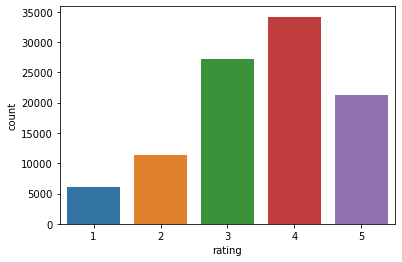

In [145]:
# Plot for 'rating':
sns.countplot(x ='rating',data = data)

<AxesSubplot:xlabel='age', ylabel='count'>

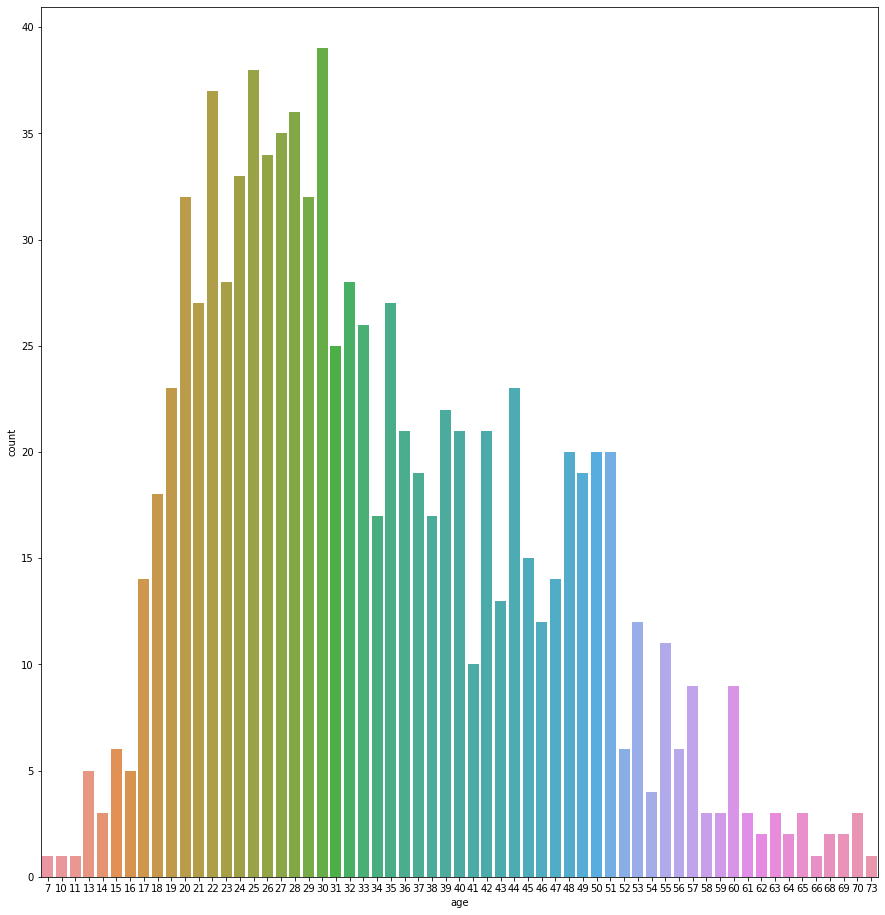

In [19]:
# Plot for 'Age':
plt.figure(figsize=(15,16))
sns.countplot(x ='age', data = user)

# Most of the public is between 20 to 35 age group

C:\Users\h250082\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

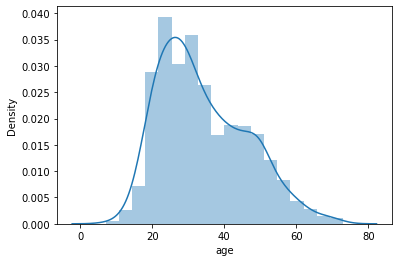

In [146]:
sns.distplot(user['age'])

# Most of the public is between 20 to 35 age group

<AxesSubplot:xlabel='gender', ylabel='count'>

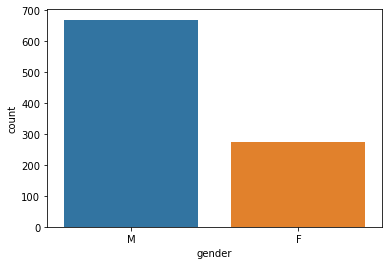

In [147]:
# Gender
sns.countplot(x ='gender', data = user)

# Male watch more movies compared to female

<AxesSubplot:xlabel='count', ylabel='occupation'>

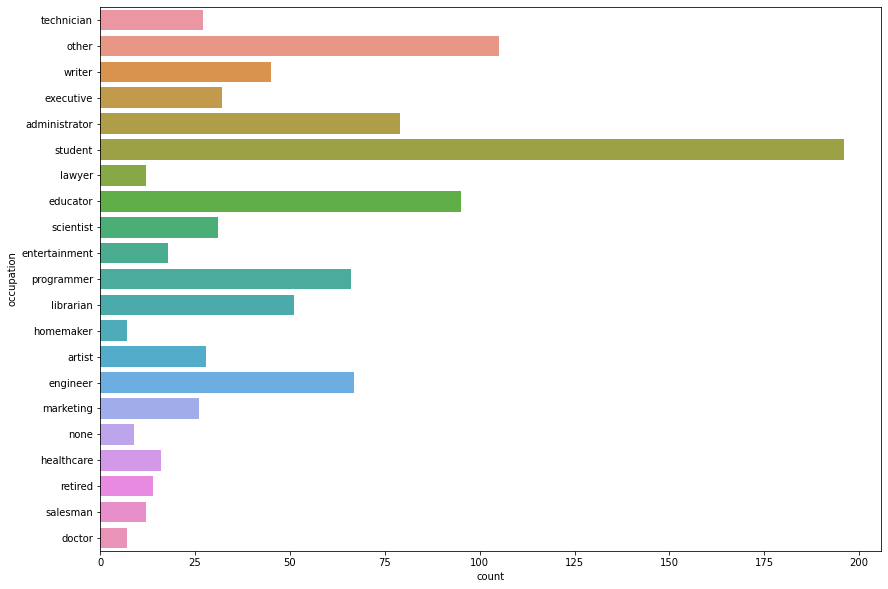

In [148]:
# Occupation
plt.figure(figsize=(14,10))
sns.countplot(y ='occupation', data = user)

# Students are watching movies the most, doctors are least

<AxesSubplot:xlabel='count', ylabel='year'>

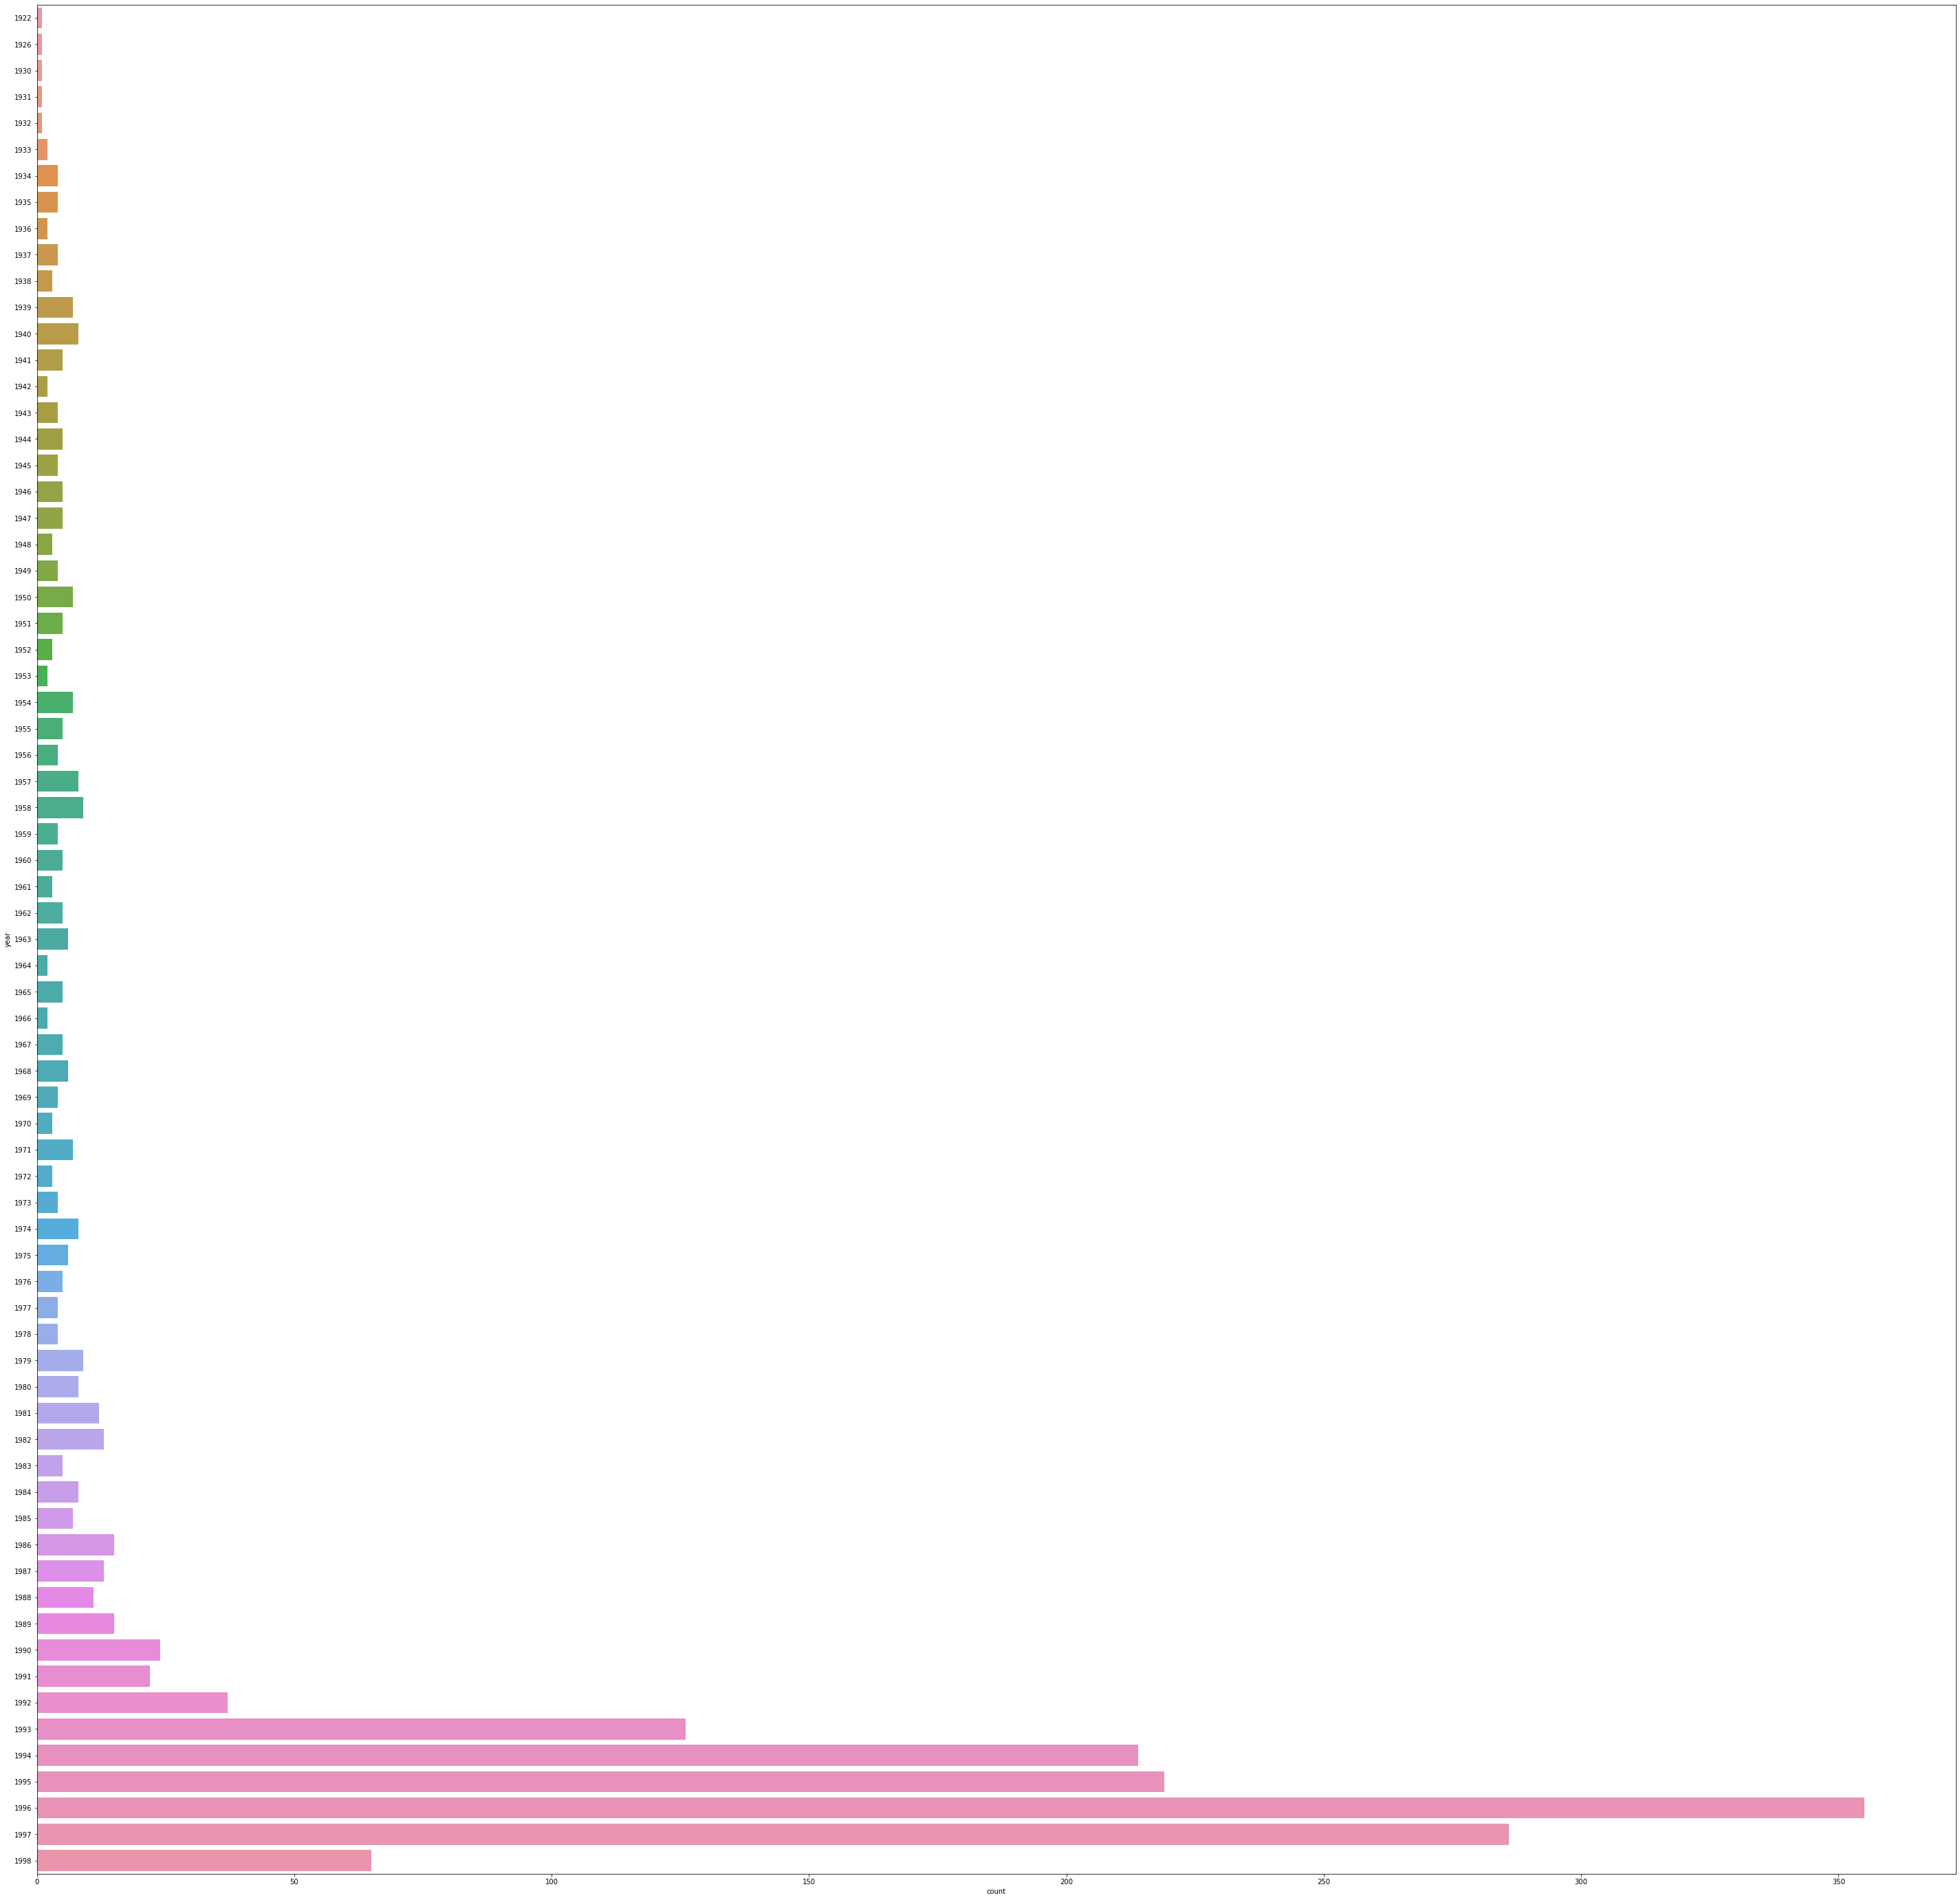

In [152]:
# Release Year
plt.rcParams['figure.figsize'] = (12,5)
plt.figure(figsize=(50,50))

# plt.axes.set_title("Title",fontsize=50)
# plt.set_xlabel("X Label",fontsize=30)
# plt.set_ylabel("Y Label",fontsize=20)
# plt.tick_params(labelsize=5)
# plt.ylabel('Signal Level (Volt)', fontsize=16, weight="bold")
# plt.xlabel('Time (Samples)', fontsize=16, weight="bold")
item['year'] = pd.DatetimeIndex(item['release date']).year
sns.countplot(y ='year', data = item)


In [161]:
item['year'] = pd.DatetimeIndex(item['release date']).year
item['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: year, Length: 1681, dtype: int64

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [153]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [154]:
genre_tmp = item.drop(columns=['movie id', 'movie title', 'release date'])
grp = genre_tmp.groupby('year')
year_wise_genre = grp.sum()
year_wise_genre.loc[:,'total'] = year_wise_genre.sum(numeric_only=True, axis=1)# Adding column for year wise sumfor each genre
year_wise_genre

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


In [155]:
year_wise_genre = year_wise_genre.div(year_wise_genre['total'], axis= 0) * 100
year_wise_genre

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,,
1922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1926,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1931,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,100.0
1932,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717,100.0
1995,0.0,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934,100.0
1996,0.0,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782,100.0


<AxesSubplot:ylabel='year'>

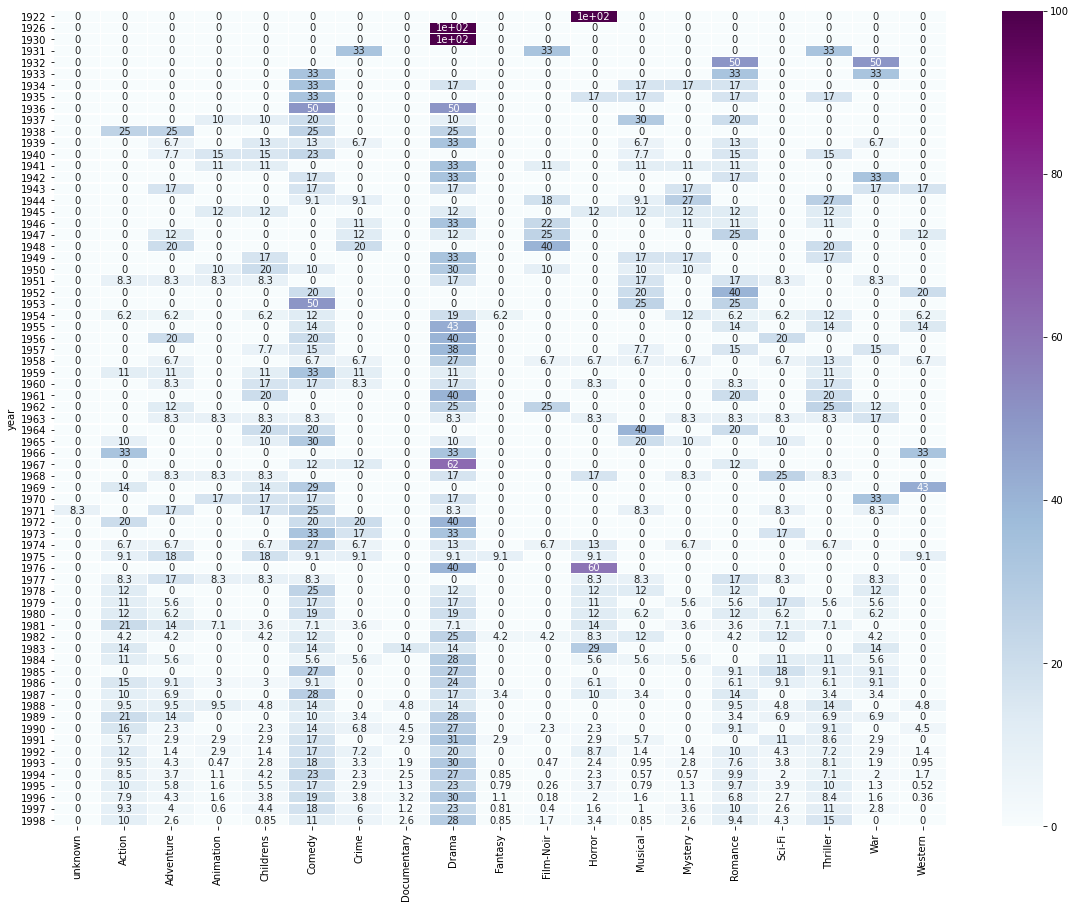

In [156]:
plt.subplots(figsize=(20,15))
year_wise_genre = year_wise_genre.iloc[:, :-1] # Drop 'toltal' column
sns.heatmap(year_wise_genre, annot=True, cmap='BuPu', linewidth=.2)

**Insights:**
Above heatmap shows that Drama and Commedy has been all time popular. Also, we can see how the popularity of genres has changed over the years.

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [25]:
movie_ratings_df = pd.merge(item, data, on='movie id')
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 26 columns):
movie id        99991 non-null int64
movie title     99991 non-null object
release date    99991 non-null object
unknown         99991 non-null int64
Action          99991 non-null int64
Adventure       99991 non-null int64
Animation       99991 non-null int64
Childrens       99991 non-null int64
Comedy          99991 non-null int64
Crime           99991 non-null int64
Documentary     99991 non-null int64
Drama           99991 non-null int64
Fantasy         99991 non-null int64
Film-Noir       99991 non-null int64
Horror          99991 non-null int64
Musical         99991 non-null int64
Mystery         99991 non-null int64
Romance         99991 non-null int64
Sci-Fi          99991 non-null int64
Thriller        99991 non-null int64
War             99991 non-null int64
Western         99991 non-null int64
year            99991 non-null int64
user id         99991 non-null int64
r

In [26]:
print(movie_ratings_df.shape)
movie_ratings_df.head(2)

(99991, 26)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1995,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1995,287,5,875334088


In [158]:
rating_avg = movie_ratings_df.groupby('movie title')['rating'].mean()
rating_avg = rating_avg.sort_values(ascending=False)
print(rating_avg.shape)
rating_avg.head()

(1658,)


movie title
Someone Else's America                  5.0
Marlene Dietrich: Shadow and Light (    5.0
Great Day in Harlem, A                  5.0
Santa with Muscles                      5.0
Saint of Fort Washington, The           5.0
Name: rating, dtype: float64

In [30]:
# Number of ratings for the movies
rating_count = movie_ratings_df.groupby('movie title')['rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:25]

movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Impossible                    344

In [31]:
rating_avg_count = pd.DataFrame(data=rating_avg)
rating_avg_count['numberOfRatings'] = pd.DataFrame(rating_count)
rating_avg_count.head()

,rating,numberOfRatings
movie title,,
Someone Else's America,5.0,1
Marlene Dietrich: Shadow and Light (,5.0,1
"Great Day in Harlem, A",5.0,1
Santa with Muscles,5.0,2
"Saint of Fort Washington, The",5.0,2


In [32]:
rating_avg_count.describe()

,rating,numberOfRatings
count,1658.000000,1658.000000
mean,3.076198,60.308203
std,0.781030,81.237240
min,1.000000,1.000000
25%,2.661950,7.000000
50%,3.161528,27.000000
75%,3.651555,80.750000
max,5.000000,583.000000


In [157]:
# Excluding movies with lenn than 100 ratings..
tmp_data = rating_avg_count[rating_avg_count['numberOfRatings'] > 100]
tmp_data[:25].style

,rating,numberOfRatings
movie title,,
"Close Shave, A",4.49107,112
Schindler's List,4.46644,298
"Wrong Trousers, The",4.4661,118
Casablanca,4.45679,243
"Shawshank Redemption, The",4.44523,283
Rear Window,4.38756,209
"Usual Suspects, The",4.38577,267
Star Wars,4.35849,583
12 Angry Men,4.344,125


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [34]:
all_df = pd.merge(movie_ratings_df, user, on='user id')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 30 columns):
movie id        99991 non-null int64
movie title     99991 non-null object
release date    99991 non-null object
unknown         99991 non-null int64
Action          99991 non-null int64
Adventure       99991 non-null int64
Animation       99991 non-null int64
Childrens       99991 non-null int64
Comedy          99991 non-null int64
Crime           99991 non-null int64
Documentary     99991 non-null int64
Drama           99991 non-null int64
Fantasy         99991 non-null int64
Film-Noir       99991 non-null int64
Horror          99991 non-null int64
Musical         99991 non-null int64
Mystery         99991 non-null int64
Romance         99991 non-null int64
Sci-Fi          99991 non-null int64
Thriller        99991 non-null int64
War             99991 non-null int64
Western         99991 non-null int64
year            99991 non-null int64
user id         99991 non-null int64
r

In [35]:
print(all_df.shape)
all_df.head()

(99991, 30)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,War,Western,year,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,1995,308,5,887737890,60,M,retired,95076
2,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,1995,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,1995,308,4,887738847,60,M,retired,95076
4,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,1995,308,5,887736696,60,M,retired,95076


In [132]:
total_ratings = all_df.shape[0]

total_movies_watched_by_women = all_df[all_df['gender'] == 'F']['rating'].count()
total_movies_watched_by_male = all_df[all_df['gender'] == 'M']['rating'].count()

print('Total no. of movies watched: ' + str(total_ratings))
print('total_movies_watched_by_women: ' + str(total_movies_watched_by_women))
print('total_movies_watched_by_male: ' + str(total_movies_watched_by_male))
male_female_ratings = all_df[['gender', 'Drama', 'Sci-Fi', 'Romance']]
female = male_female_ratings[male_female_ratings['gender'] == 'F']
male = male_female_ratings[male_female_ratings['gender'] == 'M']
print('='*30)

# Drama
f = female[female['Drama'] == 1]
m = male[male['Drama'] == 1]
drama_watched_by_female = f['Drama'].sum()
drama_watched_by_male = m['Drama'].sum()
print('drama_watched_by_female: ' + str(drama_watched_by_female))
print('drama_watched_by_male: ' + str(drama_watched_by_male))
print('='*30)

# Sci-Fi
f = female[female['Sci-Fi'] == 1]
m = male[male['Sci-Fi'] == 1]
sc_fi_watched_by_female = f['Sci-Fi'].sum()
sc_fi_watched_by_male = m['Sci-Fi'].sum()
print('Sci-Fi_watched_by_female: ' + str(sc_fi_watched_by_female))
print('Sci-Fi_watched_by_male: ' + str(sc_fi_watched_by_male))
print('='*30)

# Sci-Fi
f = female[female['Romance'] == 1]
m = male[male['Romance'] == 1]
Romance_watched_by_female = f['Romance'].sum()
Romance_watched_by_male = m['Romance'].sum()
print('Romance_watched_by_female: ' + str(Romance_watched_by_female))
print('Romance_watched_by_male: ' + str(Romance_watched_by_male))
print('='*30)

Total no. of movies watched: 99991
total_movies_watched_by_women: 25738
total_movies_watched_by_male: 74253
drama_watched_by_female: 11008
drama_watched_by_male: 28887
Sci-Fi_watched_by_female: 2629
Sci-Fi_watched_by_male: 10101
Romance_watched_by_female: 5858
Romance_watched_by_male: 13603


In [135]:
# Out of 25738 ratings received by women, 11008 are for drama 
female_drama_watch_percent = (drama_watched_by_female / total_movies_watched_by_women)*100
print('female_drama_watch_percent: ' + str(female_drama_watch_percent))
male_drama_watch_percent = (drama_watched_by_male / total_movies_watched_by_male)*100
print('male_drama_watch_percent: ' + str(male_drama_watch_percent))
print('='*30)

female_sci_fi_watch_percent = (sc_fi_watched_by_female / total_movies_watched_by_women)*100
print('female_sci_fi_watch_percent: ' + str(female_sci_fi_watch_percent))
male_sci_fi_watch_percent = (sc_fi_watched_by_male / total_movies_watched_by_male)*100
print('male_sci_fi_watch_percent: ' + str(male_sci_fi_watch_percent))
print('='*30)

female_romance_watch_percent = (Romance_watched_by_female / total_movies_watched_by_women)*100
print('female_romance_watch_percent: ' + str(female_romance_watch_percent))
male_romance_watch_percent = (Romance_watched_by_male / total_movies_watched_by_male)*100
print('male_romance_watch_percent: ' + str(male_romance_watch_percent))
print('='*30)

female_drama_watch_percent: 42.76944595539669
male_drama_watch_percent: 38.90347864732738
female_sci_fi_watch_percent: 10.214468878700753
male_sci_fi_watch_percent: 13.603490768049776
female_romance_watch_percent: 22.760121221540135
male_romance_watch_percent: 18.319798526658857


**Conclusion:**
- Men watch more drama than women: False
- Women watch more Sci-Fi than men: False
- Men watch more Romance than women: False
